# Decesion Tree Classification on IRIS Dataset

### Importing libraries

In [56]:
#import warnings
import warnings
warnings.filterwarnings("ignore")
#import basic libraries
import numpy as np
import pandas as pd

### Reading and understanding values

In [47]:
#reading and understanding data
data=pd.read_csv('iris.csv')
data.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Data Modelling

In [48]:
#mapping the target varible into categorical values
def mapping(x):
    if(x=='Iris-setosa'):
        return 0
    elif(x=='Iris-versicolor'):
        return 1
    else:
        return 2
        
data.Species=data.Species.apply(mapping)

In [49]:
#dropping the unrequired column
data.drop('Id',axis=1,inplace=True)

In [50]:
# Dividing the dataset into predictor and target varibale X and y
X=data.iloc[:,:-1]
X
y=data.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

### Spliting data into train-test-split

In [51]:
#importing train-test-split to split the data into training and testing 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=100)

###  Defining Decision Tree Algorithm

In [52]:
#using decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

### Evaluating the model

In [53]:
#importing accuracy score to see the accuracy
from sklearn.metrics import accuracy_score
y_pred=dtc.predict(X_test)
accuracy_score(y_pred,y_test)

0.9555555555555556

The accuracy is quite good

###  Visualizing the Decision Tree to understand it 

In [54]:
#import necessory libraries for graph viz
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

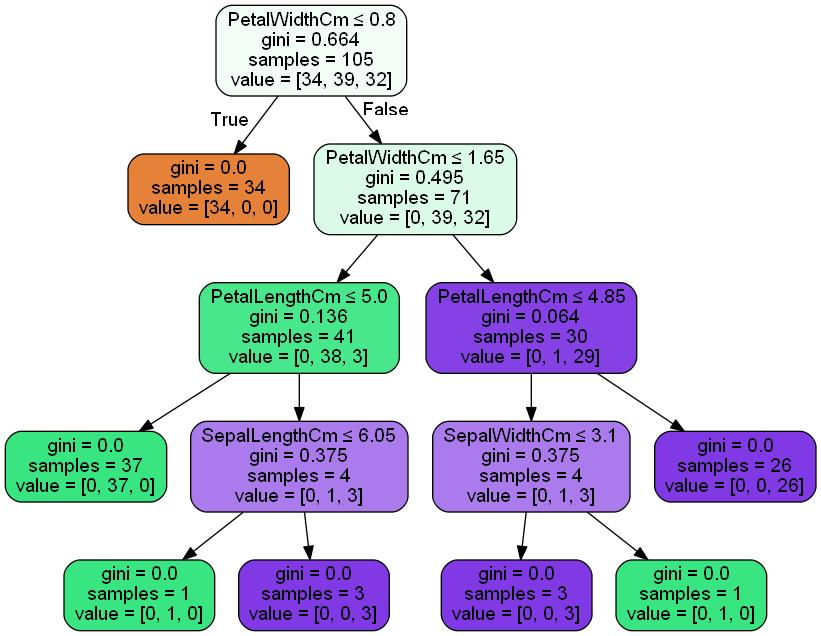

In [55]:
#visualize the graph
dot_data=StringIO()
export_graphviz(dtc,out_file=dot_data,feature_names=X.columns,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_jpg())